In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import pearsonr
import sys
sys.path.append('../')
from helpers import *
from analysis_helper import *
import seaborn as sns

In [2]:
data_path = './../../../data'
advocate_dir = os.path.join(data_path, 'BeerAdvocate')
exp_categories = get_exp_categories(data_path) + ['expertness_score']
rev_with_scores = pd.read_pickle(os.path.join(advocate_dir, 'rev_w_scores.pkl'))
rev_with_scores['date'] = pd.to_datetime(rev_with_scores['date'])

adv_beers = pd.read_csv(os.path.join(advocate_dir, 'beers_BA_clean.csv'))
users = pd.read_csv(os.path.join(advocate_dir, 'users_BA_clean.csv'))

In [ ]:

scores_for_beer = get_scores_for_beers(rev_with_scores, exp_categories)


In [ ]:
scores_for_beer

review_count    flavor            mouthfeel             brewing  \
               count      mean        std      mean       std      mean   
beer_id                                                                   
3                  3  4.666667   0.577350  2.000000  1.000000  1.666667   
4                 10  4.600000   2.503331  3.000000  1.154701  1.700000   
5                543  2.661142   1.781232  1.797422  1.318137  1.134438   
6               1019  4.253189   2.245860  1.997056  1.448864  1.074583   
7                811  1.861899   1.549406  1.596794  1.366780  1.076449   
...              ...       ...        ...       ...       ...       ...   
292902             2  5.500000   0.707107  4.000000  1.414214  1.500000   
292909             2  5.000000   1.414214  3.000000  1.414214  1.000000   
292983             2  7.500000  10.606602  2.000000  2.828427  0.500000   
292990             3  1.333333   2.309401  0.333333  0.577350  1.333333   
293279             2  7.000000   0.000000  4.000000  0.000000  1.500000   

                  technical           appearance           off_flavors  \
              std      mean       std       mean       std        mean   
beer_id                                                                  
3        0.577350  1.666667  0.577350   2.000000  1.000000    0.000000   
4        1.059350  1.500000  1.269296   3.200000  1.686548    0.600000   
5        0.856046  1.132597  1.215257   2.267035  1.251036    0.198895   
6        0.842354  1.091266  1.183761   2.409225  1.491414    0.197252   
7        0.923801  0.890259  1.091625   1.875462  1.309237    0.246609   
...           ...       ...       ...        ...       ...         ...   
292902   0.707107  2.500000  0.707107   2.000000  0.000000    0.500000   
292909   0.000000  1.500000  0.707107   1.500000  0.707107    0.500000   
292983   0.707107  0.500000  0.707107   2.000000  1.414214    0.000000   
292990   0.577350  1.000000  0.000000   0.333333  0.577350    0.000000   
293279   0.707107  3.000000  0.000000   3.500000  2.121320    0.000000   

                  expertness_score             
              std             mean        std  
beer_id                                        
3        0.000000        12.000000   3.000000  
4        0.699206        14.600000   5.081557  
5        0.459663         9.191529   4.369907  
6        0.459940        11.022571   5.044447  
7        0.531337         7.547472   4.128032  
...           ...              ...        ...  
292902   0.707107        16.000000   1.414214  
292909   0.707107        12.500000   2.121320  
292983   0.000000        12.500000  16.263456  
292990   0.000000         4.333333   3.214550  
293279   0.000000        19.000000   1.414214  

[93763 rows x 15 columns]

In [ ]:
scores_for_beer.isnull().values.any()

False

In [ ]:
mean_scores_beer = get_mean_scores_beer(rev_with_scores, exp_categories)
complete_beer = pd.merge(adv_beers, mean_scores_beer, on='beer_id')

In [79]:
mean_scores_beer = get_mean_scores_beer(rev_with_scores, exp_categories)
complete_beer = pd.merge(adv_beers, mean_scores_beer[mean_scores_beer['review_count']>=10], on='beer_id')

In [80]:
beer_gr =  get_beer_gr(complete_beer, exp_categories)
beer_gr

flavor  mouthfeel   brewing  technical  \
style                                                                  
Altbier                     3.785373   2.265867  1.389616   1.524684   
American Adjunct Lager      1.279126   1.780614  1.232772   0.967639   
American Amber / Red Ale    3.860798   2.120267  1.445304   1.399012   
American Amber / Red Lager  2.954901   1.986644  1.348951   1.306196   
American Barleywine         5.096560   2.459319  1.248720   1.486584   
...                              ...        ...       ...        ...   
Vienna Lager                2.956455   2.022911  1.364357   1.402243   
Weizenbock                  4.992537   2.429359  1.142181   1.469734   
Wheatwine                   4.974530   2.437351  1.366425   1.422289   
Winter Warmer               4.343740   2.306836  1.061885   1.360520   
Witbier                     3.872239   2.122190  0.941222   1.294521   

                            appearance  off_flavors  expertness_score  
style                                                                  
Altbier                       2.381224     0.265196         11.611961  
American Adjunct Lager        1.953162     0.454183          7.667496  
American Amber / Red Ale      2.390619     0.241938         11.457937  
American Amber / Red Lager    2.238239     0.288806         10.123738  
American Barleywine           2.258228     0.328777         12.878188  
...                                ...          ...               ...  
Vienna Lager                  2.251793     0.271709         10.269468  
Weizenbock                    2.392342     0.330852         12.757005  
Wheatwine                     2.136496     0.372200         12.709291  
Winter Warmer                 2.390319     0.239918         11.703219  
Witbier                       2.455449     0.320237         11.005858  

[104 rows x 7 columns]

In [ ]:
for col in exp_categories:    
    print(col, beer_gr.iloc[beer_gr[col].argmax()].name )

flavor Belgian IPA
mouthfeel Irish Dry Stout
brewing American Pale Wheat Ale
technical American Double / Imperial Pilsner
appearance Black & Tan
off_flavors Gueuze
expertness_score American Black Ale


In [110]:
beer_max = pd.DataFrame()
for col in exp_categories:
    if col =='expertness_score':
        continue
    beer_max = pd.concat([beer_max, beer_gr.loc[beer_gr[col].idxmax():beer_gr[col].idxmax()]])


In [111]:
normalized_beer_max = beer_max / beer_gr.max()

In [112]:
normalized_beer_max = normalized_beer_max.drop(columns='expertness_score')

In [114]:
normalized_beer_max

flavor  mouthfeel   brewing  technical  \
style                                                                          
Belgian IPA                         1.000000   0.818488  0.818357   0.884117   
Irish Dry Stout                     0.680856   1.000000  0.595473   0.614837   
American Pale Wheat Ale             0.645378   0.710273  1.000000   0.690973   
American Double / Imperial Pilsner  0.806823   0.824480  0.963231   1.000000   
Black & Tan                         0.609205   0.816335  0.703067   0.613373   
Gueuze                              0.828488   0.897930  0.254924   0.912250   

                                    appearance  off_flavors  
style                                                        
Belgian IPA                           0.732548     0.207391  
Irish Dry Stout                       0.851637     0.115950  
American Pale Wheat Ale               0.744579     0.155025  
American Double / Imperial Pilsner    0.712160     0.145052  
Black & Tan                           1.000000     0.173004  
Gueuze                                0.684011     1.000000

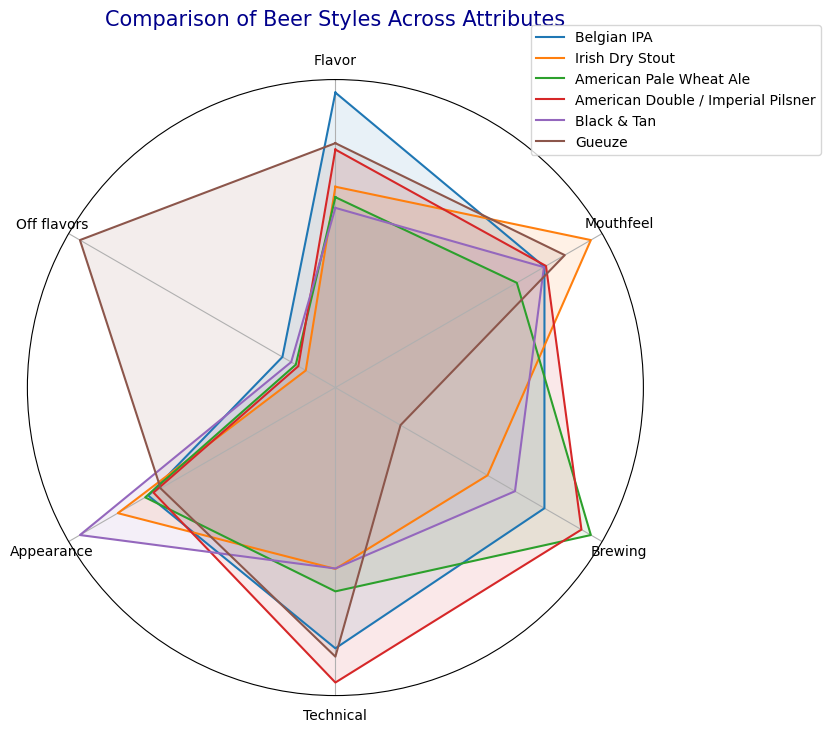

In [116]:
# Categories for radar chart
categories = ["Flavor", "Mouthfeel", "Brewing", "Technical", "Appearance", "Off flavors"]
num_vars = len(categories)

# Set up radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Function to plot a radar chart
def plot_radar_chart(df, categories, title):
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw one beer style per loop
    for beer in df.index:
        values = df.loc[beer].tolist()  # Get the values for the beer style
        values += values[:1]  # Complete the loop for each beer style
        ax.plot(angles, values, label=beer)
        ax.fill(angles, values, alpha=0.1)

    # Add labels for each axis
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.yaxis.set_visible(False)

    # Add title and legend
    plt.title(title, size=15, color='darkblue', pad=20)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    plt.show()

# Generate radar chart
plot_radar_chart(normalized_beer_max, categories, "Comparison of Beer Styles Across Attributes")


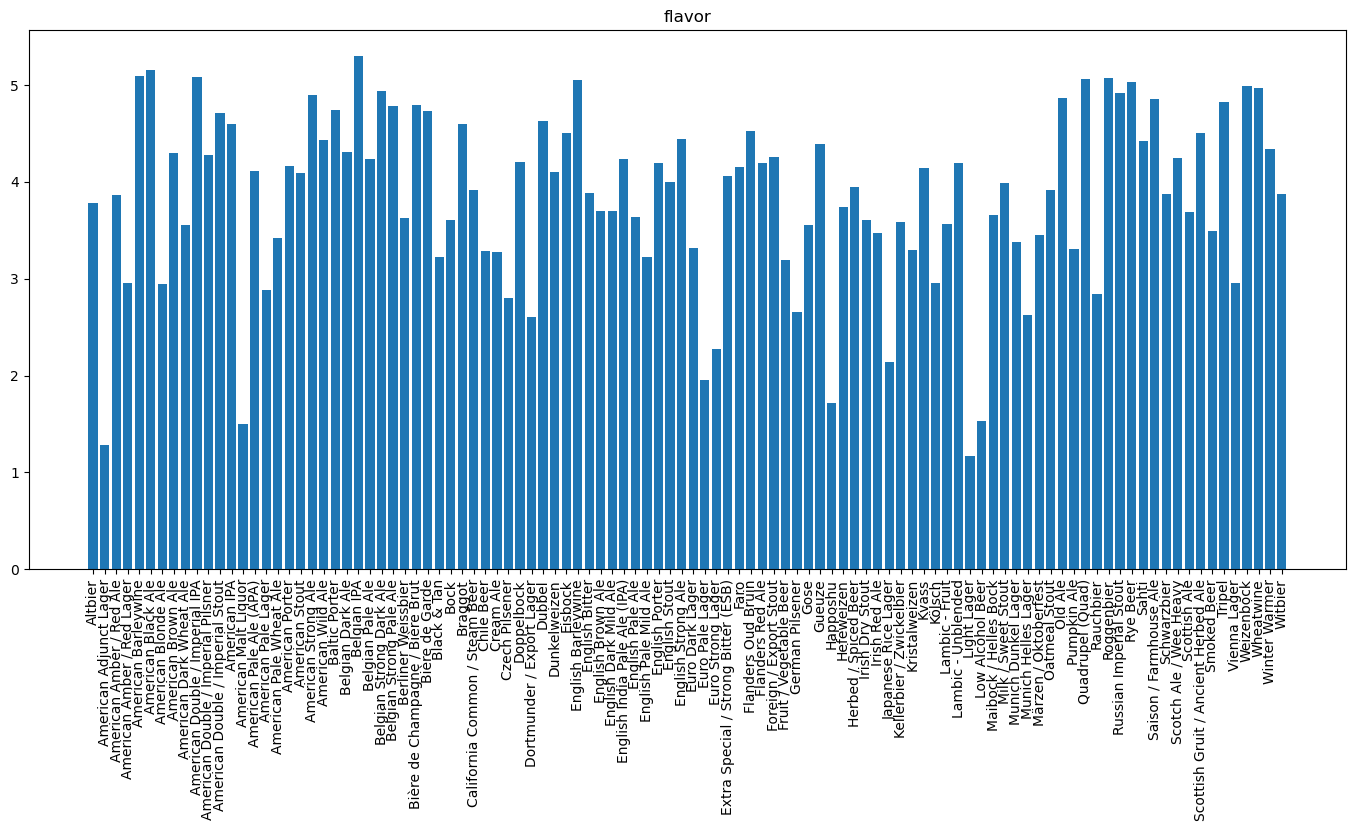

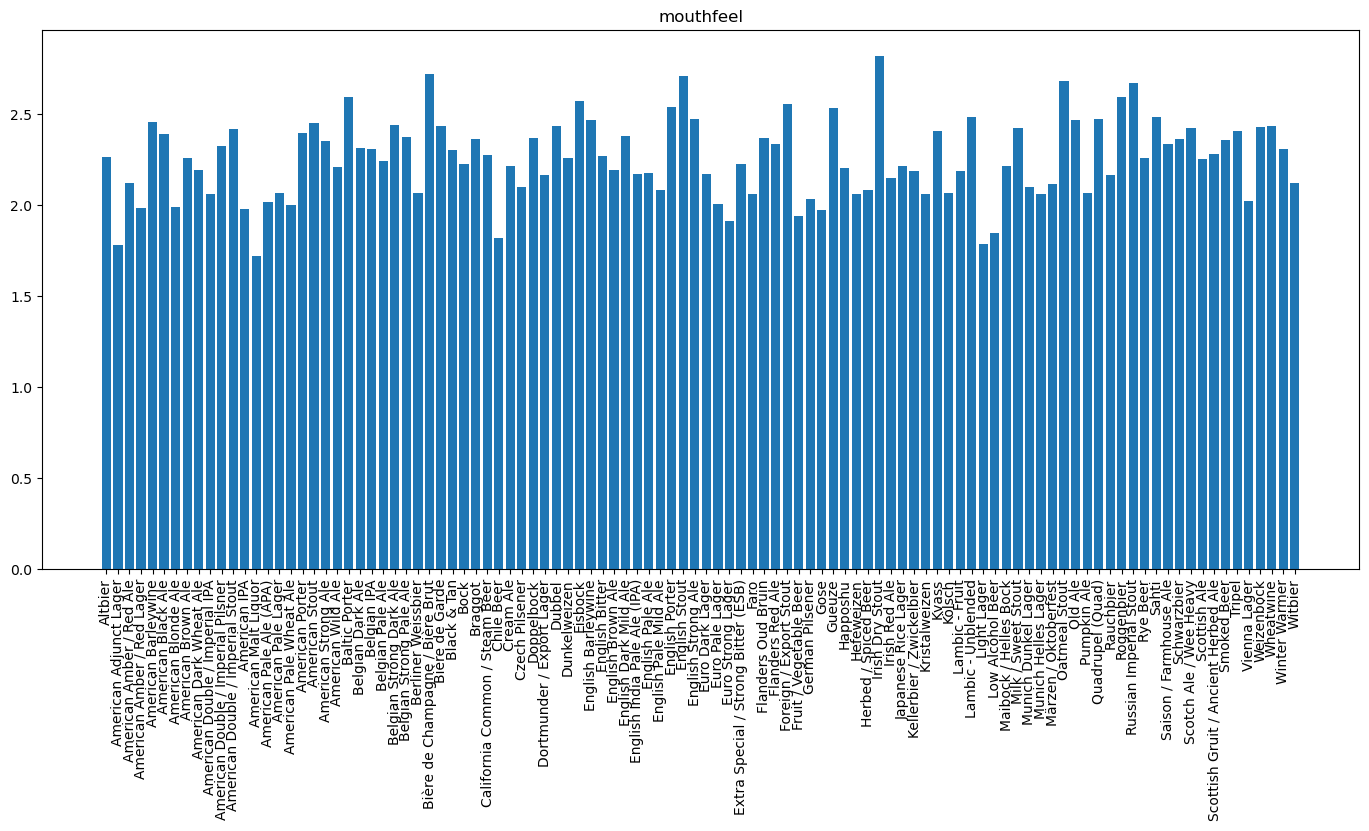

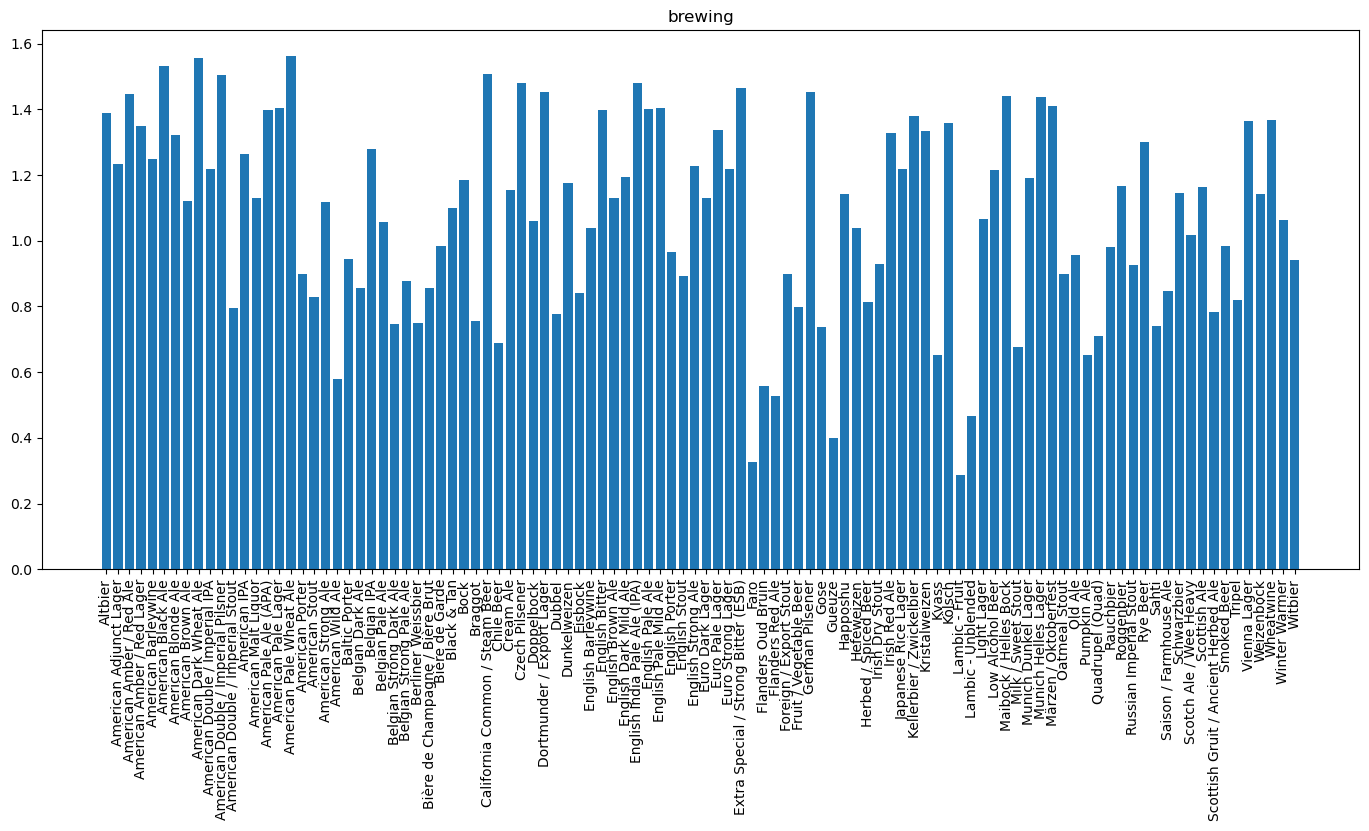

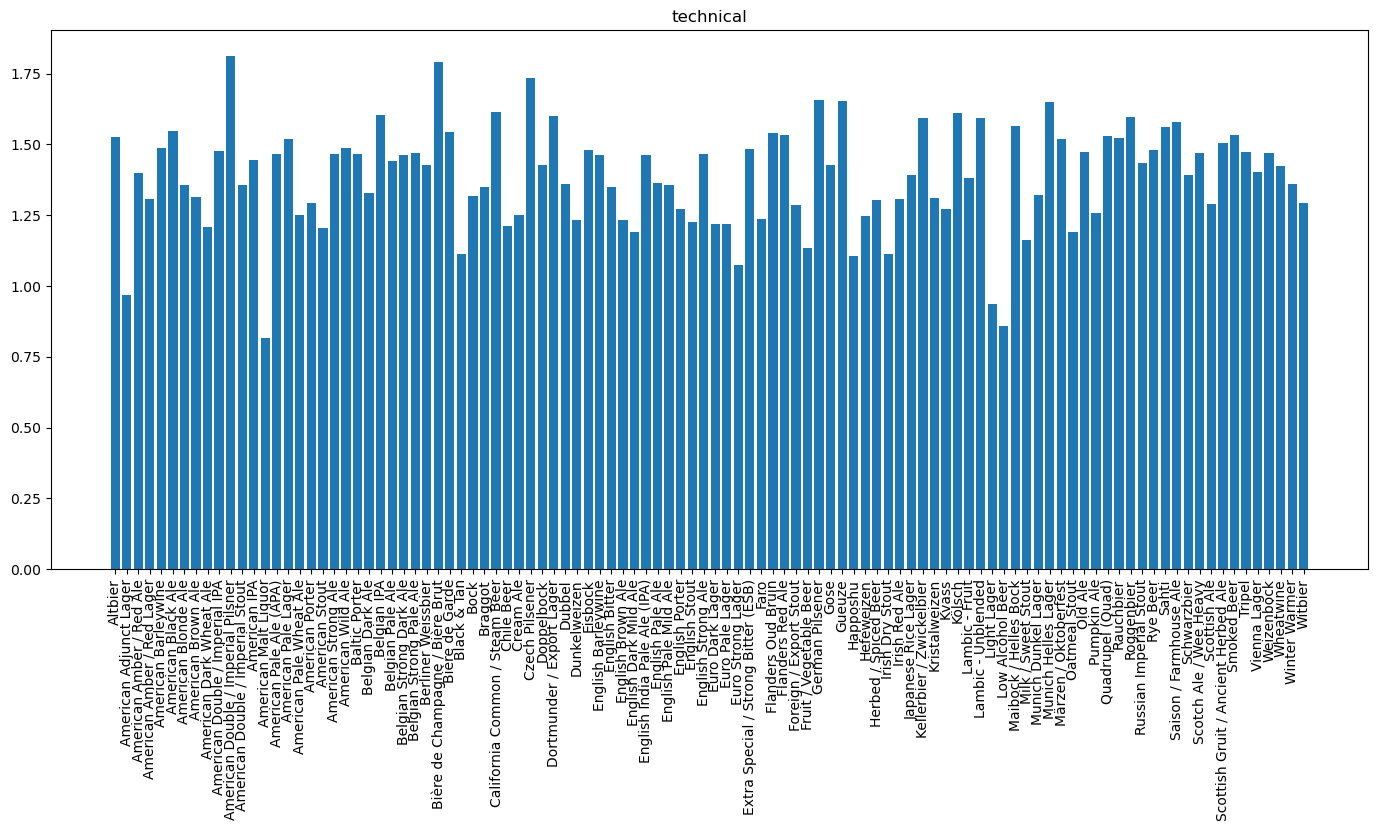

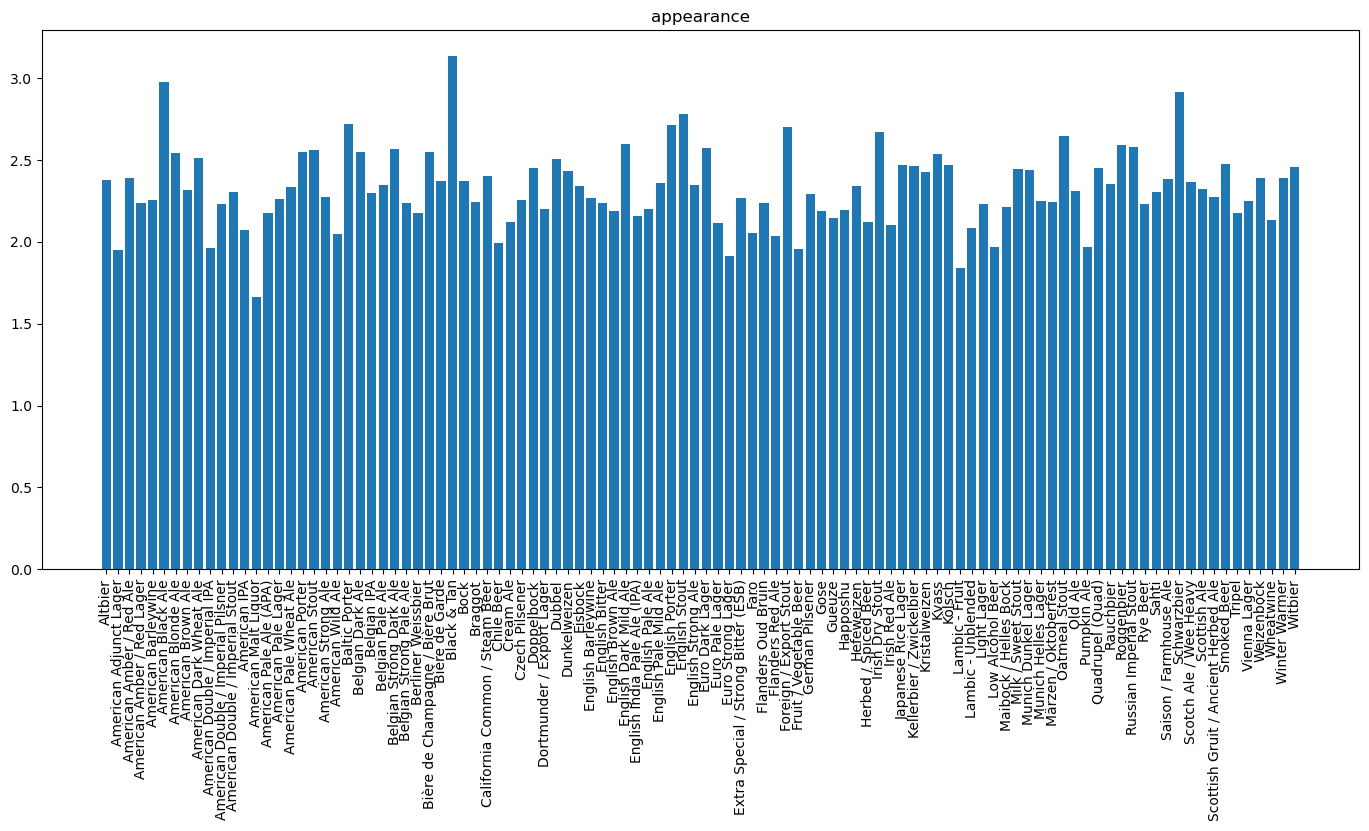

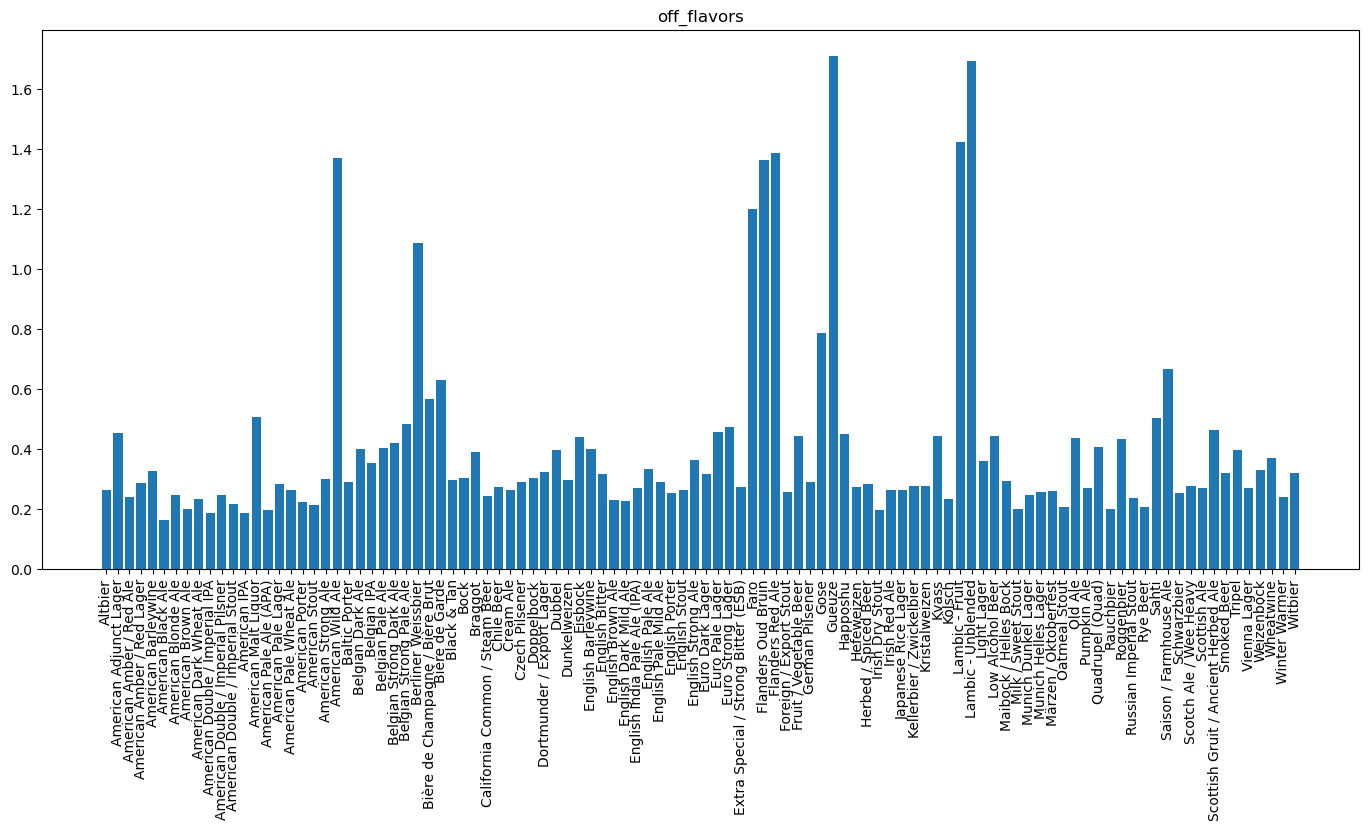

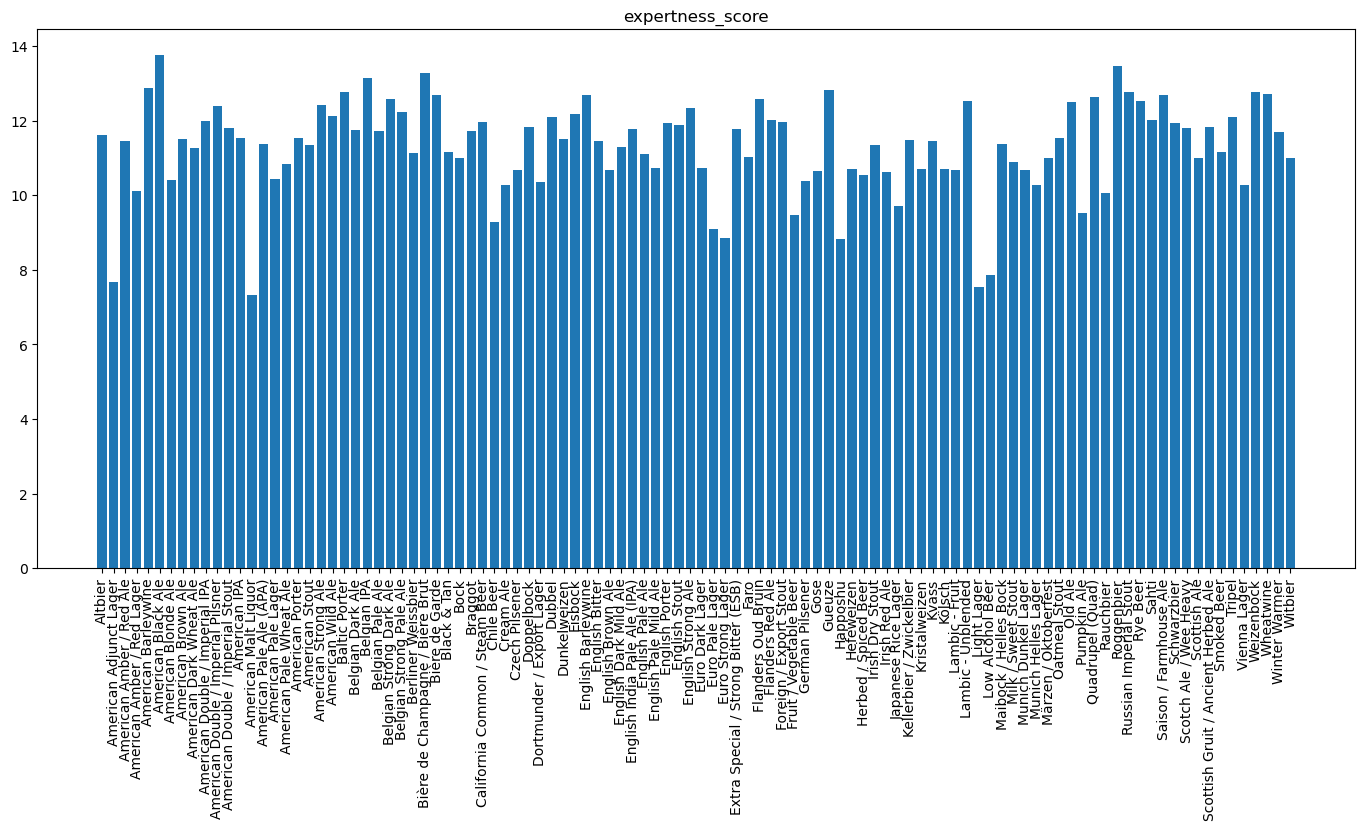

In [81]:
for col in exp_categories:    
    fig  = plt.figure(figsize=(17,7))
    plt.bar(beer_gr.index, beer_gr[col])
    plt.title(col)

    plt.xticks(rotation=90)
    plt.show()

In [9]:
mean_scores_beer['review_count'].corr(mean_scores_beer['expertness_score'])

0.020931297040495574

<Axes: >

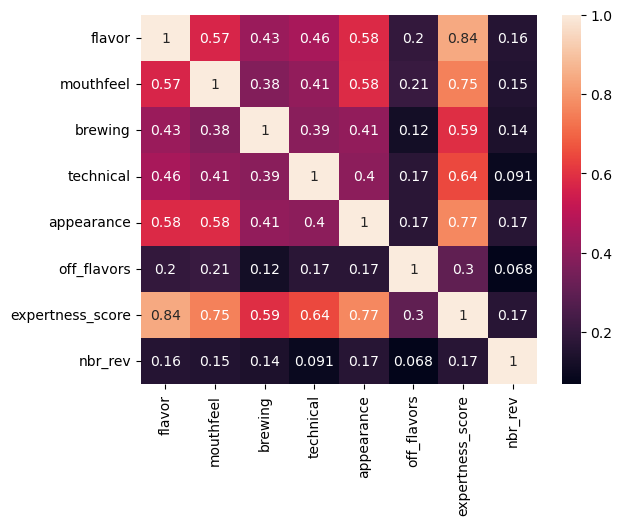

In [66]:
users_stats = get_users_stats(rev_exp_std, exp_categories)
for_corr = exp_categories + ['nbr_rev']
sns.heatmap(users_stats[for_corr].corr(), annot=True)

<Axes: >

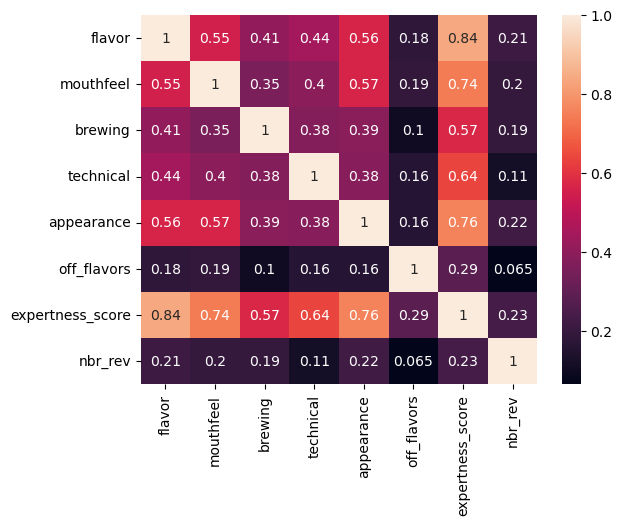

In [67]:
sns.heatmap(users_stats[users_stats['nbr_rev']<200][for_corr].corr(), annot=True)

In [12]:
pearsonr(users_stats['expertness_score'], users_stats['nbr_rev'])

PearsonRResult(statistic=0.2084933089630822, pvalue=0.0)

In [ ]:
# Normalizes review dates to the first review date for each user, setting their first review as day zero.
rev_zero_date= joined_date_zero(rev_with_scores)
# Standardize the reviews score through the mean and the std of the scores for that particular beer 
rev_std = standardize(rev_zero_date, scores_for_beer.reset_index(), exp_categories)

result = rev_std.groupby('user_id').apply(corr_and_count, include_groups=False)

result = result.dropna()
result

/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:93: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:138: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(group[att_1], group['date'].astype(int))
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:138: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(group[att_1], group['date'].astype(int))
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:138: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pe

correlation   p_value  total_count
user_id                                               
--dom--.709199        -0.429749  0.001321         53.0
-mk-.763762           -0.303799  0.464454          8.0
-rick.912339           0.266238  0.000175        194.0
-steve-.781156         0.354058  0.031562         37.0
007.8521              -0.198875  0.748464          5.0
...                         ...       ...          ...
zymurgylabs.718885     0.000000  1.000000          2.0
zymurgywhiz.265202     0.000000  1.000000          2.0
zythophile.1101219     0.151563  0.041677        181.0
zythus.301538          0.113452  0.789096          8.0
zz427.1113802         -1.000000  1.000000          2.0

[37233 rows x 3 columns]

In [ ]:
result[(result['total_count'] > 20) & (result['total_count'] < 500)]['correlation'].mean()

0.06257289946973467

In [ ]:
result['correlation'].mean()

0.035390309405985323

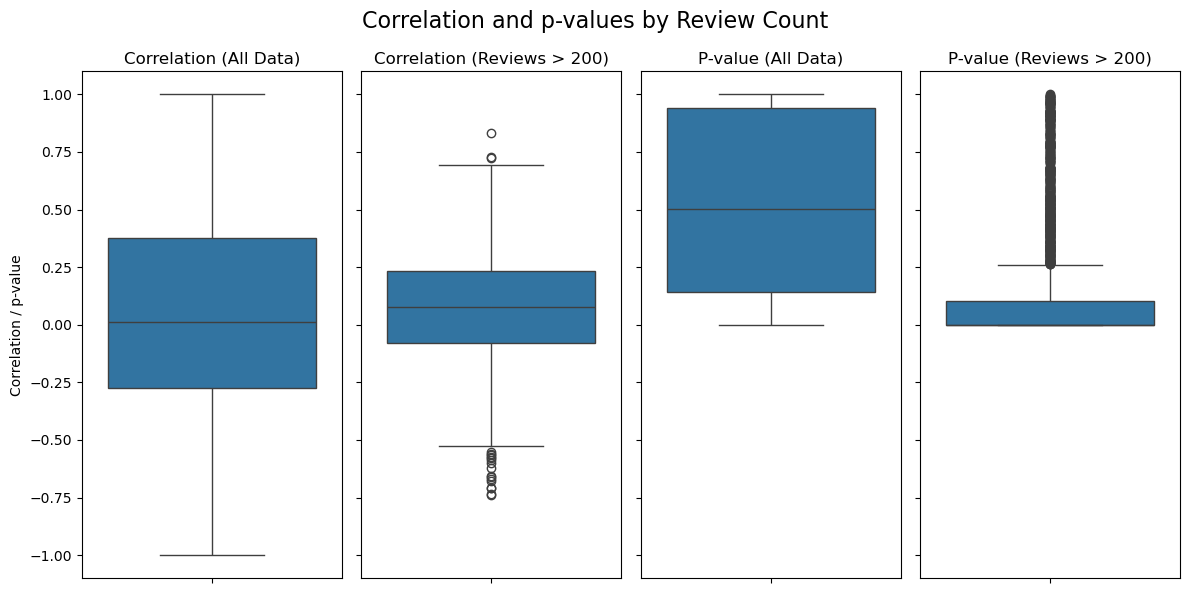

In [ ]:
plot_corr_and_pvalue(result)

In [ ]:
len(users[users['nbr_ratings']>200])

5234

In [ ]:
rev_of_exp = review_of_experts(rev_with_scores, users, nbr_rev=200)
rev_of_exp = first_reviews(rev_of_exp, max=100)
rev_exp_zero_date= joined_date_zero(rev_of_exp)

rev_exp_std = standardize(rev_exp_zero_date, scores_for_beer.reset_index(), exp_categories)
result = rev_exp_std.groupby('user_id').apply(corr_and_count, include_groups=False)

/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:93: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:138: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(group[att_1], group['date'].astype(int))
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:138: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(group[att_1], group['date'].astype(int))
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:138: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pe

In [ ]:
result = result.dropna()

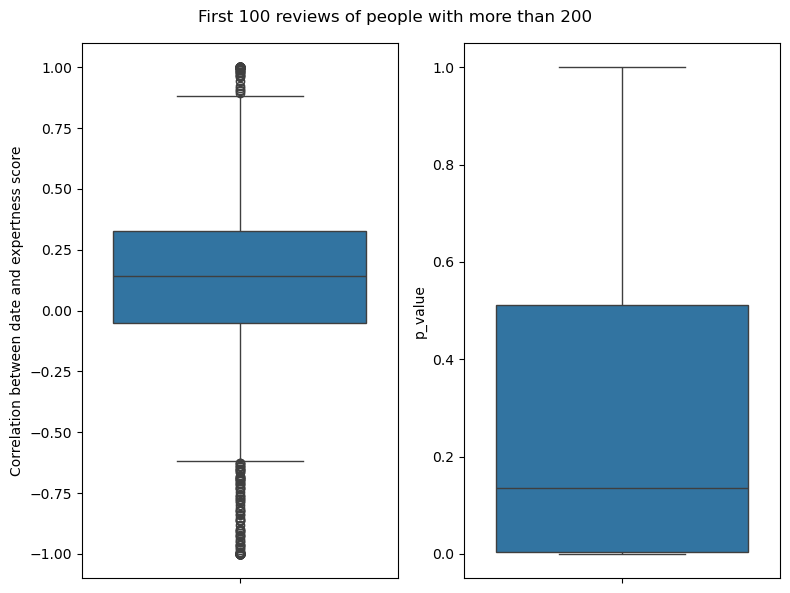

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6)) 

fig.suptitle('First 100 reviews of people with more than 200')

sns.boxplot(y=result['correlation'], ax=axes[0])

axes[0].set_ylabel("Correlation between date and expertness score")

sns.boxplot(y=result['p_value'], ax=axes[1])
axes[1].set_ylabel("p_value")

plt.tight_layout()  
plt.show()


In [ ]:
result['correlation'].mean()

0.12560090240522961

In [ ]:
rev_of_exp = review_of_experts(rev_with_scores, users, nbr_rev=200)
rev_of_exp = first_reviews(rev_of_exp, max=5)

/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:93: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])


Text(0.5, 1.0, 'Mean of the score (standardized) of the first 5 reviews of people with more than 200')

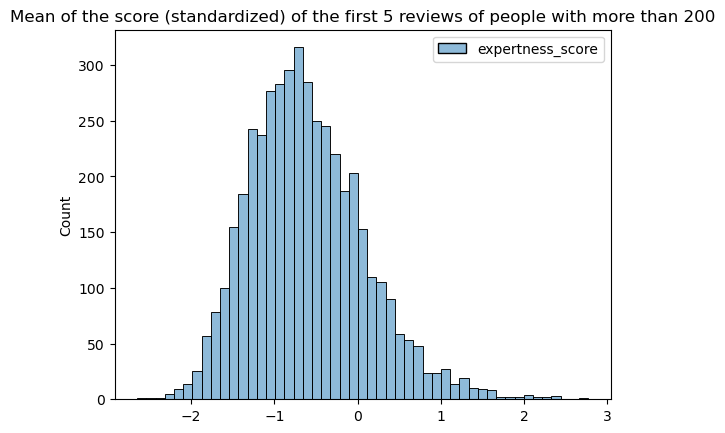

In [ ]:
rev_exp_std = standardize(rev_of_exp, scores_for_beer.reset_index(), exp_categories)
rev_exp_std_grouped = rev_exp_std.groupby('user_id')[['expertness_score']].agg('mean')
sns.histplot(rev_exp_std_grouped)
plt.title('Mean of the score (standardized) of the first 5 reviews of people with more than 200')

In [ ]:
no_already_experts = rev_exp_std_grouped[rev_exp_std_grouped['expertness_score']<-0.5].index

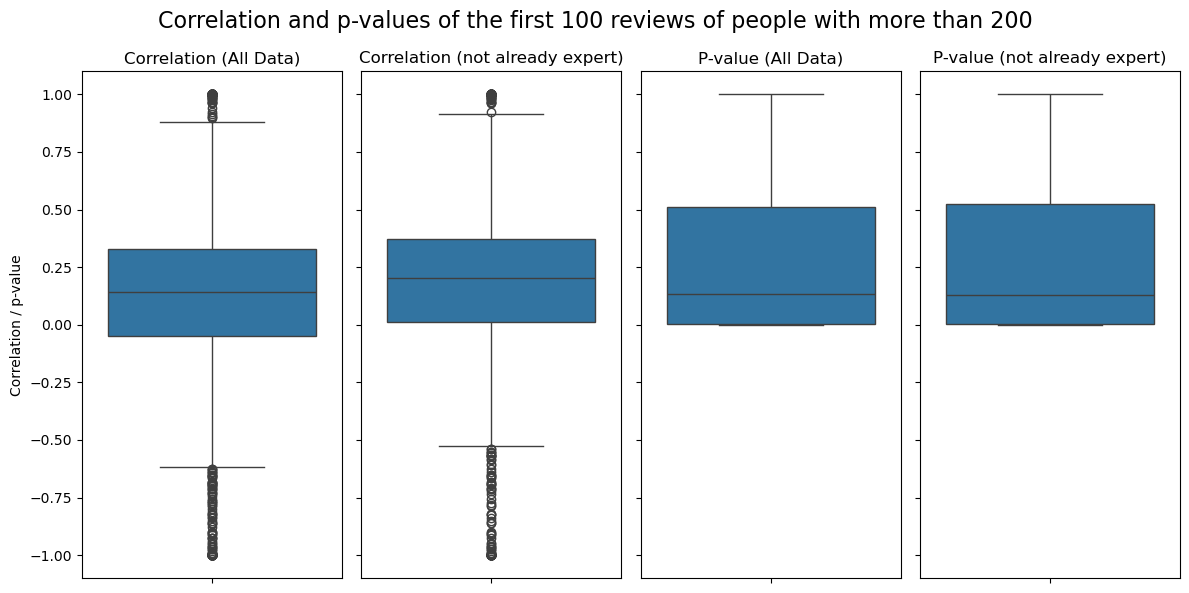

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey = True) 

fig.suptitle("Correlation and p-values of the first 100 reviews of people with more than 200", fontsize=16)
sns.boxplot(y=result['correlation'], ax=axes[0])
axes[0].set_title("Correlation (All Data)")
axes[0].set_ylabel("Correlation / p-value")

sns.boxplot(y=result[result.index.isin(no_already_experts)]['correlation'], ax=axes[1])
axes[1].set_title("Correlation (not already expert)")

sns.boxplot(y=result['p_value'], ax=axes[2])
axes[2].set_title("P-value (All Data)")

sns.boxplot(y=result[result.index.isin(no_already_experts)]['p_value'], ax=axes[3])
axes[3].set_title("P-value (not already expert)")

plt.tight_layout()
plt.show()

In [ ]:
result[result.index.isin(no_already_experts)].correlation.mean()

0.17618207688566326

In [ ]:
result[result.index.isin(no_already_experts)].p_value.describe()

count    2.493000e+03
mean     2.837411e-01
std      3.270868e-01
min      1.077282e-21
25%      3.136296e-03
50%      1.290119e-01
75%      5.260742e-01
max      1.000000e+00
Name: p_value, dtype: float64

## Using and incremental count instead of the date

In [ ]:

rev_exp_std = standardize(rev_with_scores, scores_for_beer.reset_index(), exp_categories)


/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:93: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])


Text(0.5, 1.0, 'Expertness Score Over Time')

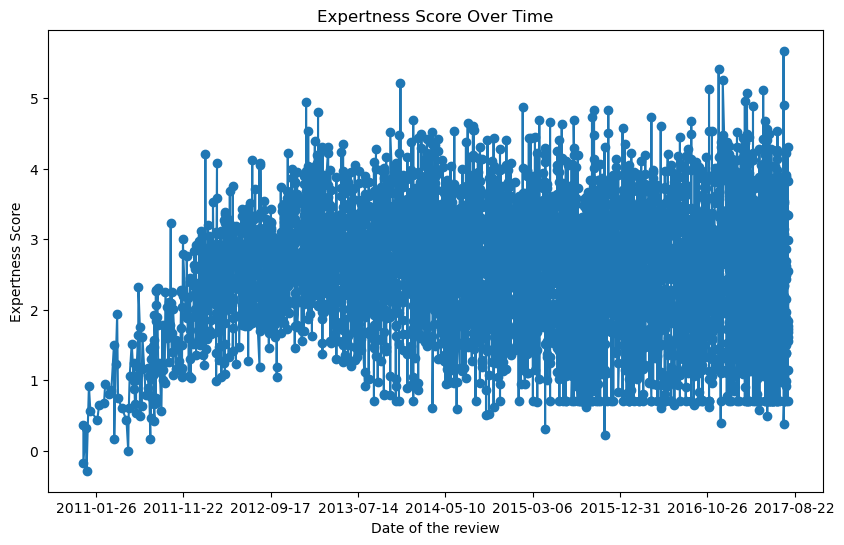

In [ ]:
# Pick specific example
rev_spec = rev_exp_std[( rev_exp_std['user_id'] =='superspak.456300')]

sorted_data = rev_spec.sort_values(by='date', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(sorted_data['date'], sorted_data['expertness_score'], marker='o', color="#1f77b4")
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
ax.set_xlabel("Date of the review")
ax.set_ylabel("Expertness Score")
ax.set_title("Expertness Score Over Time")

In [ ]:
result_rep_date = rev_exp_std.groupby('user_id').apply(lambda group: corr_and_count(group, replace_date=True), include_groups=False)
result_rep_date = result_rep_date.dropna()

In [ ]:
len(result_rep_date)

38672

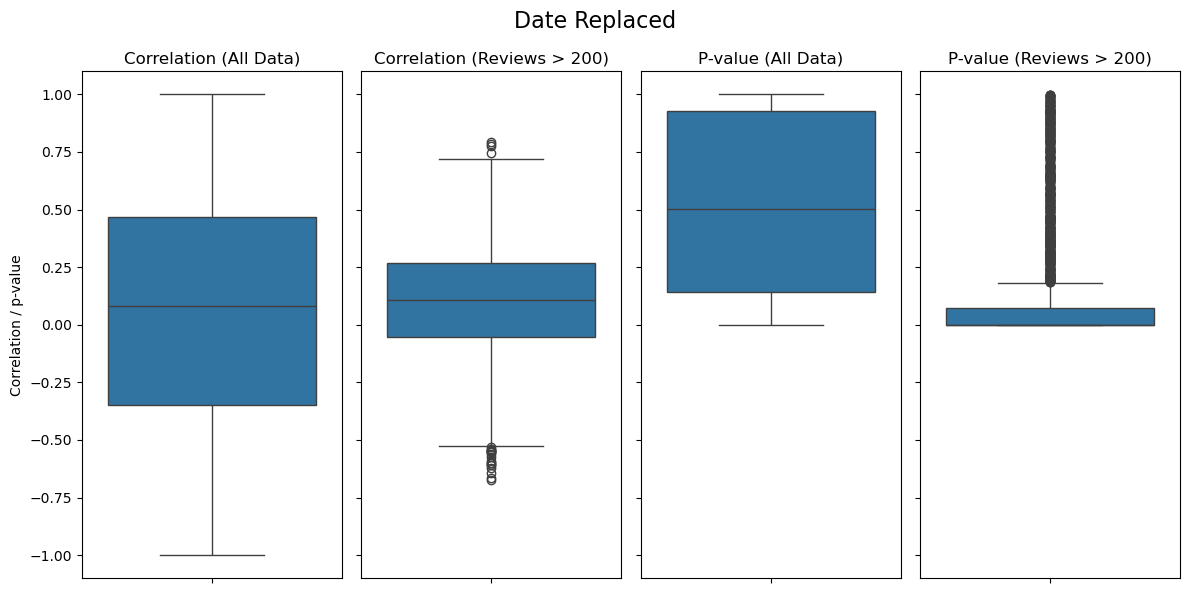

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey = True) 

fig.suptitle('Date Replaced', fontsize=16)
sns.boxplot(y=result_rep_date['correlation'], ax=axes[0])
axes[0].set_title("Correlation (All Data)")
axes[0].set_ylabel("Correlation / p-value")

sns.boxplot(y=result_rep_date[result_rep_date['total_count'] > 200]['correlation'], ax=axes[1])
axes[1].set_title("Correlation (Reviews > 200)")

sns.boxplot(y=result_rep_date['p_value'], ax=axes[2])
axes[2].set_title("P-value (All Data)")

sns.boxplot(y=result_rep_date[result_rep_date['total_count'] > 200]['p_value'], ax=axes[3])
axes[3].set_title("P-value (Reviews > 200)")


plt.tight_layout()  
plt.show()

In [ ]:
result_rep_date[(result_rep_date['total_count'] > 20) & (result_rep_date['total_count'] < 500)]['correlation'].mean()

0.09688471255499548

In [ ]:
result_rep_date['correlation'].mean()

0.0458133273902438

In [ ]:
rev_of_exp = review_of_experts(rev_with_scores, users, nbr_rev=200)
rev_of_exp = first_reviews(rev_of_exp, max=100)

rev_exp_std = standardize(rev_of_exp, scores_for_beer.reset_index(), exp_categories)
result_rep_date = rev_exp_std.groupby('user_id').apply(lambda group: corr_and_count(group, replace_date=True), include_groups=False)
result_rep_date = result_rep_date.dropna()

/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:93: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])


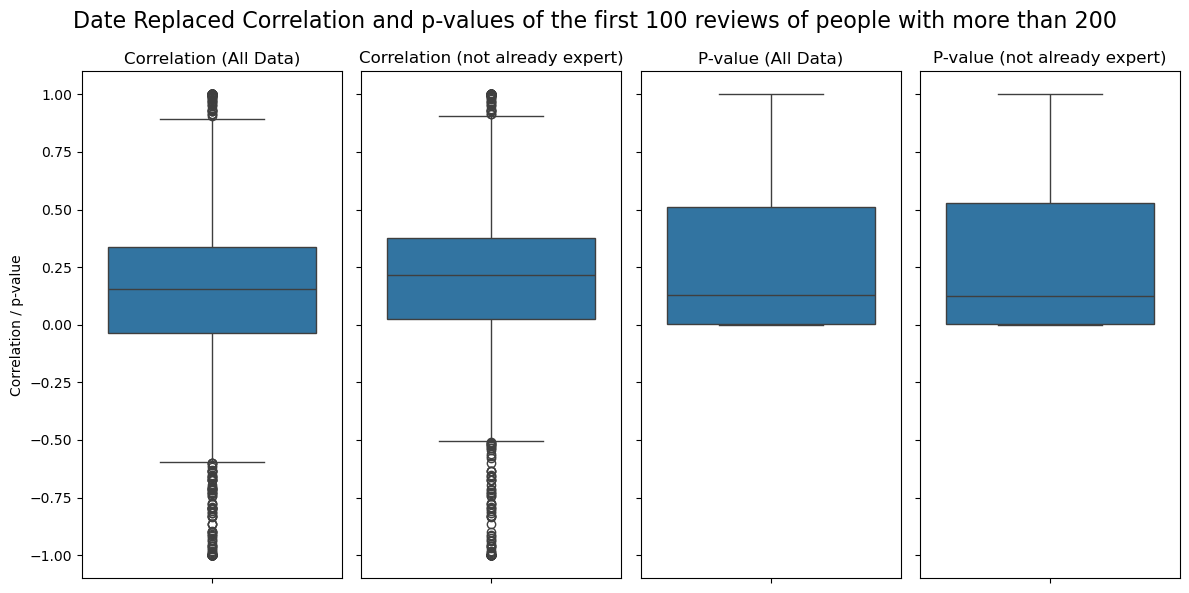

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey=True) 


fig.suptitle("Date Replaced Correlation and p-values of the first 100 reviews of people with more than 200", fontsize=16)
sns.boxplot(y=result_rep_date['correlation'], ax=axes[0])
axes[0].set_title("Correlation (All Data)")
axes[0].set_ylabel("Correlation / p-value")

sns.boxplot(y=result_rep_date[result_rep_date.index.isin(no_already_experts)]['correlation'], ax=axes[1])
axes[1].set_title("Correlation (not already expert)")

sns.boxplot(y=result_rep_date['p_value'], ax=axes[2])
axes[2].set_title("P-value (All Data)")

sns.boxplot(y=result_rep_date[result_rep_date.index.isin(no_already_experts)]['p_value'], ax=axes[3])
axes[3].set_title("P-value (not already expert)")

plt.tight_layout()
plt.show()

In [ ]:
result_rep_date[result_rep_date.index.isin(no_already_experts)].correlation.mean()

0.18715355721716442

In [ ]:
result_rep_date.correlation.mean()

0.13564570318969657

In [ ]:
result_rep_date[result_rep_date.index.isin(no_already_experts)].p_value.describe()

count    2.503000e+03
mean     2.865210e-01
std      3.310237e-01
min      1.480821e-25
25%      2.720781e-03
50%      1.268977e-01
75%      5.303085e-01
max      1.000000e+00
Name: p_value, dtype: float64

## Avg user evolution

In [3]:
nbr_rev=150 #minimun nuber of reviews of a user for the following analysis  

In [4]:
rev_exp_std = standardize_min_max(rev_with_scores, exp_categories, by_style=True) 

In [5]:
rev_of_exp = review_of_experts(rev_exp_std, users, nbr_rev=nbr_rev)
first_rev_of_exp = first_reviews(rev_of_exp, max=5)

Text(0.5, 1.0, 'Mean of the score (standardized) of the first 5 reviews of people with more than 150')

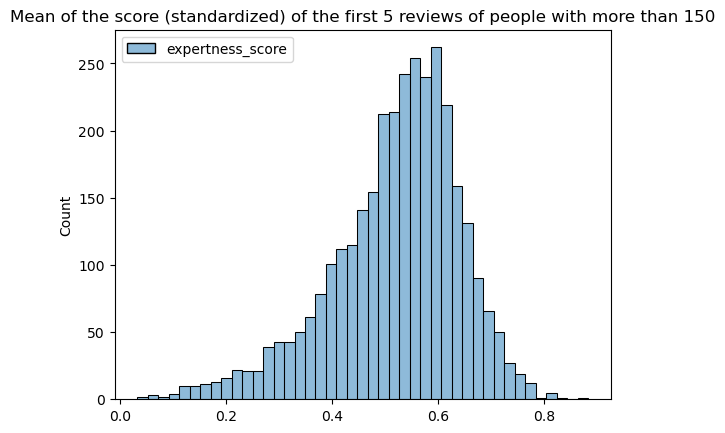

In [6]:
rev_exp_std_grouped = first_rev_of_exp.groupby('user_id')[['expertness_score']].agg('mean')
sns.histplot(rev_exp_std_grouped, color='hls')
plt.title('Mean of the score (standardized) of the first 5 reviews of people with more than %d' %(nbr_rev))

In [7]:
len(rev_exp_std_grouped)

3277

In [8]:
threshold = rev_exp_std_grouped['expertness_score'].quantile(0.2)

no_already_experts = rev_exp_std_grouped[rev_exp_std_grouped['expertness_score'] < threshold].index
len(no_already_experts)

656

In [9]:
threshold = rev_exp_std_grouped['expertness_score'].quantile(0.8)

already_experts = rev_exp_std_grouped[rev_exp_std_grouped['expertness_score'] > threshold].index
len(already_experts)

656

In [10]:
sel_rev_of_exp = first_reviews(rev_of_exp, max=50)
result_rep_date = sel_rev_of_exp.groupby('user_id').apply(lambda group: corr_and_count(group, replace_date=True), include_groups=False)
result_rep_date = result_rep_date.dropna()

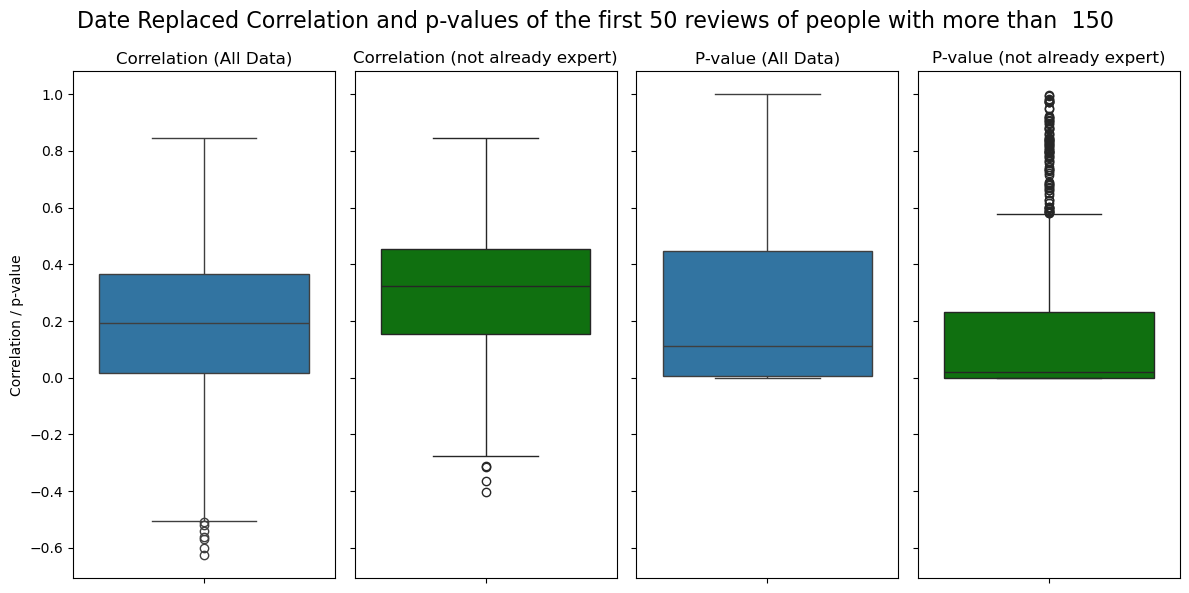

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey=True) 

fig.suptitle("Date Replaced Correlation and p-values of the first 50 reviews of people with more than  %d" %(nbr_rev), fontsize=16)
sns.boxplot(y=result_rep_date['correlation'], ax=axes[0])
axes[0].set_title("Correlation (All Data)")
axes[0].set_ylabel("Correlation / p-value")

sns.boxplot(y=result_rep_date[result_rep_date.index.isin(no_already_experts)]['correlation'], ax=axes[1], color = 'green')
axes[1].set_title("Correlation (not already expert)")

sns.boxplot(y=result_rep_date['p_value'], ax=axes[2])
axes[2].set_title("P-value (All Data)")

sns.boxplot(y=result_rep_date[result_rep_date.index.isin(no_already_experts)]['p_value'], ax=axes[3], color = 'green')
axes[3].set_title("P-value (not already expert)")

plt.tight_layout()
plt.show()

In [12]:
result_rep_date[result_rep_date.index.isin(no_already_experts)].correlation.median()

0.3252034714558465

In [13]:
result_rep_date[result_rep_date.index.isin(no_already_experts)].p_value.describe()

count    6.560000e+02
mean     1.719426e-01
std      2.707440e-01
min      9.749198e-15
25%      8.772843e-04
50%      2.018746e-02
75%      2.311455e-01
max      9.976403e-01
Name: p_value, dtype: float64

In [14]:
rev_of_exp = review_of_experts(rev_exp_std, users, nbr_rev=nbr_rev)
first_rev_of_exp = first_reviews(rev_of_exp, max=nbr_rev)

In [15]:
rev_no_al_exp = first_rev_of_exp[first_rev_of_exp.user_id.isin(no_already_experts)]
rev_no_al_exp = rev_no_al_exp.sort_values(by=['user_id', 'date'])

# Create incremental numbers for each user
rev_no_al_exp['rev_nbr'] = rev_no_al_exp.groupby('user_id').cumcount() 

rev_no_al_exp = rev_no_al_exp.drop(columns=['date'])

In [16]:
col_to_keep = ['rev_nbr']+ exp_categories
avg_no_al_exp = rev_no_al_exp[col_to_keep].groupby('rev_nbr').agg(['mean', ('sem', lambda x: x.sem())])


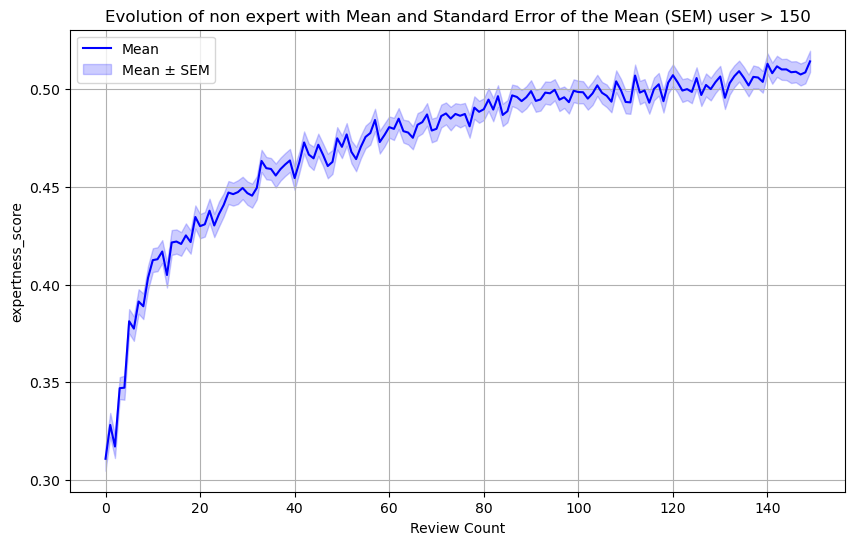

In [17]:
# Plot mean and SEM
plt.figure(figsize=(10, 6))

# Plot the mean
plt.plot(avg_no_al_exp.index, avg_no_al_exp['expertness_score']['mean'], label='Mean', color='blue')

# Plot the SEM as a shaded area
plt.fill_between(
    avg_no_al_exp.index,
    avg_no_al_exp['expertness_score']['mean'] - avg_no_al_exp['expertness_score']['sem'],
    avg_no_al_exp['expertness_score']['mean'] + avg_no_al_exp['expertness_score']['sem'],
    color='blue',
    alpha=0.2,
    label='Mean ± SEM'
)

# Formatting the plot
plt.title('Evolution of non expert with Mean and Standard Error of the Mean (SEM) user > %d' %(nbr_rev))
plt.xlabel('Review Count')
plt.ylabel('expertness_score')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Plot for everyone

In [18]:
nbr_rev=1000
rev = review_of_experts(rev_exp_std, users, nbr_rev=5)
first_rev = first_reviews(rev, max=5)
rev_std_grouped = first_rev.groupby('user_id')[['expertness_score']].agg('mean')

Text(0.5, 1.0, 'Mean of the score (standardized) of the first 5 reviews')

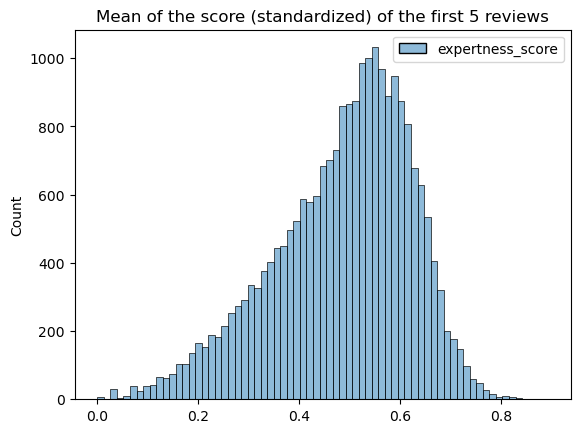

In [19]:
sns.histplot(rev_std_grouped, color='hls')
plt.title('Mean of the score (standardized) of the first 5 reviews')

In [20]:
exp_levels={}
threshold_20 = rev_std_grouped['expertness_score'].quantile(0.2)
exp_levels['Bottom 20%'] = rev_std_grouped[rev_std_grouped['expertness_score'] < threshold_20].index

threshold_80 = rev_std_grouped['expertness_score'].quantile(0.8)
exp_levels['Top 20%'] = rev_std_grouped[rev_std_grouped['expertness_score'] >= threshold_80].index

exp_levels['20-80%'] = rev_std_grouped[
    (rev_std_grouped['expertness_score'] >= threshold_20) & 
    (rev_std_grouped['expertness_score'] < threshold_80)
].index


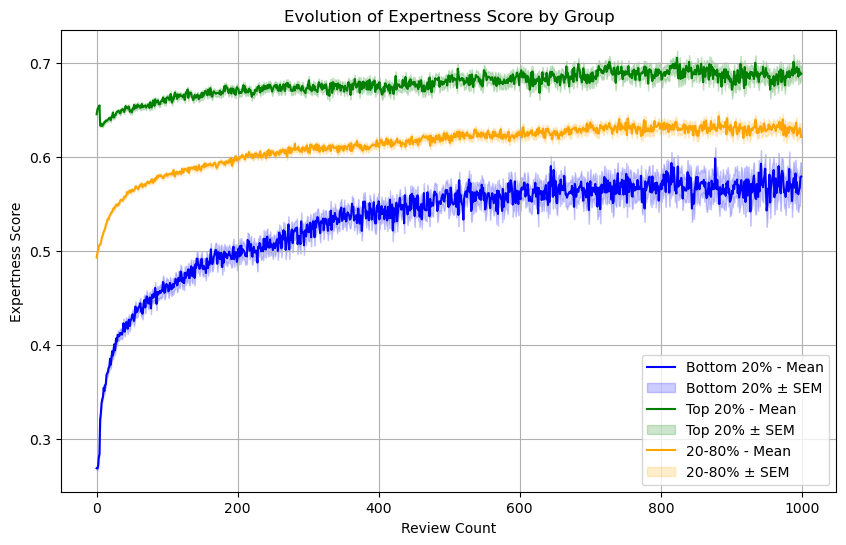

In [21]:
first_rev = first_reviews(rev, max=nbr_rev)

# Define the colors for each group
colors = {
    'Bottom 20%': 'blue',
    'Top 20%': 'green',
    '20-80%': 'orange'
}

# Initialize a single plot
plt.figure(figsize=(10, 6))

# Loop through each expertise group and calculate stats
for key, value in exp_levels.items():
    # Filter reviews for the current group
    rev_no_al_exp = first_rev[first_rev.user_id.isin(value)]
    rev_no_al_exp = rev_no_al_exp.sort_values(by=['user_id', 'date'])

    # Create incremental review numbers for each user
    rev_no_al_exp['rev_nbr'] = rev_no_al_exp.groupby('user_id').cumcount()

    # Drop unnecessary columns
    rev_no_al_exp = rev_no_al_exp.drop(columns=['date'])
    col_to_keep = ['rev_nbr'] + exp_categories

    # Group by review number and calculate mean and SEM
    avg_no_al_exp = rev_no_al_exp[col_to_keep].groupby('rev_nbr').agg(['mean', ('sem', lambda x: x.sem())])

    # Plot the mean line
    plt.plot(
        avg_no_al_exp.index,
        avg_no_al_exp['expertness_score']['mean'],
        label=f"{key} - Mean",
        color=colors[key]
    )

    # Plot the SEM as a shaded area
    plt.fill_between(
        avg_no_al_exp.index,
        avg_no_al_exp['expertness_score']['mean'] - avg_no_al_exp['expertness_score']['sem'],
        avg_no_al_exp['expertness_score']['mean'] + avg_no_al_exp['expertness_score']['sem'],
        color=colors[key],
        alpha=0.2,
        label=f"{key} ± SEM"
    )

# Formatting the plot
plt.title('Evolution of Expertness Score by Group')
plt.xlabel('Review Count')
plt.ylabel('Expertness Score')
plt.legend()
plt.grid(True)

# Show the combined plot
plt.show()



# Evolution per category

In [22]:
first_rev = first_reviews(rev, max=nbr_rev)


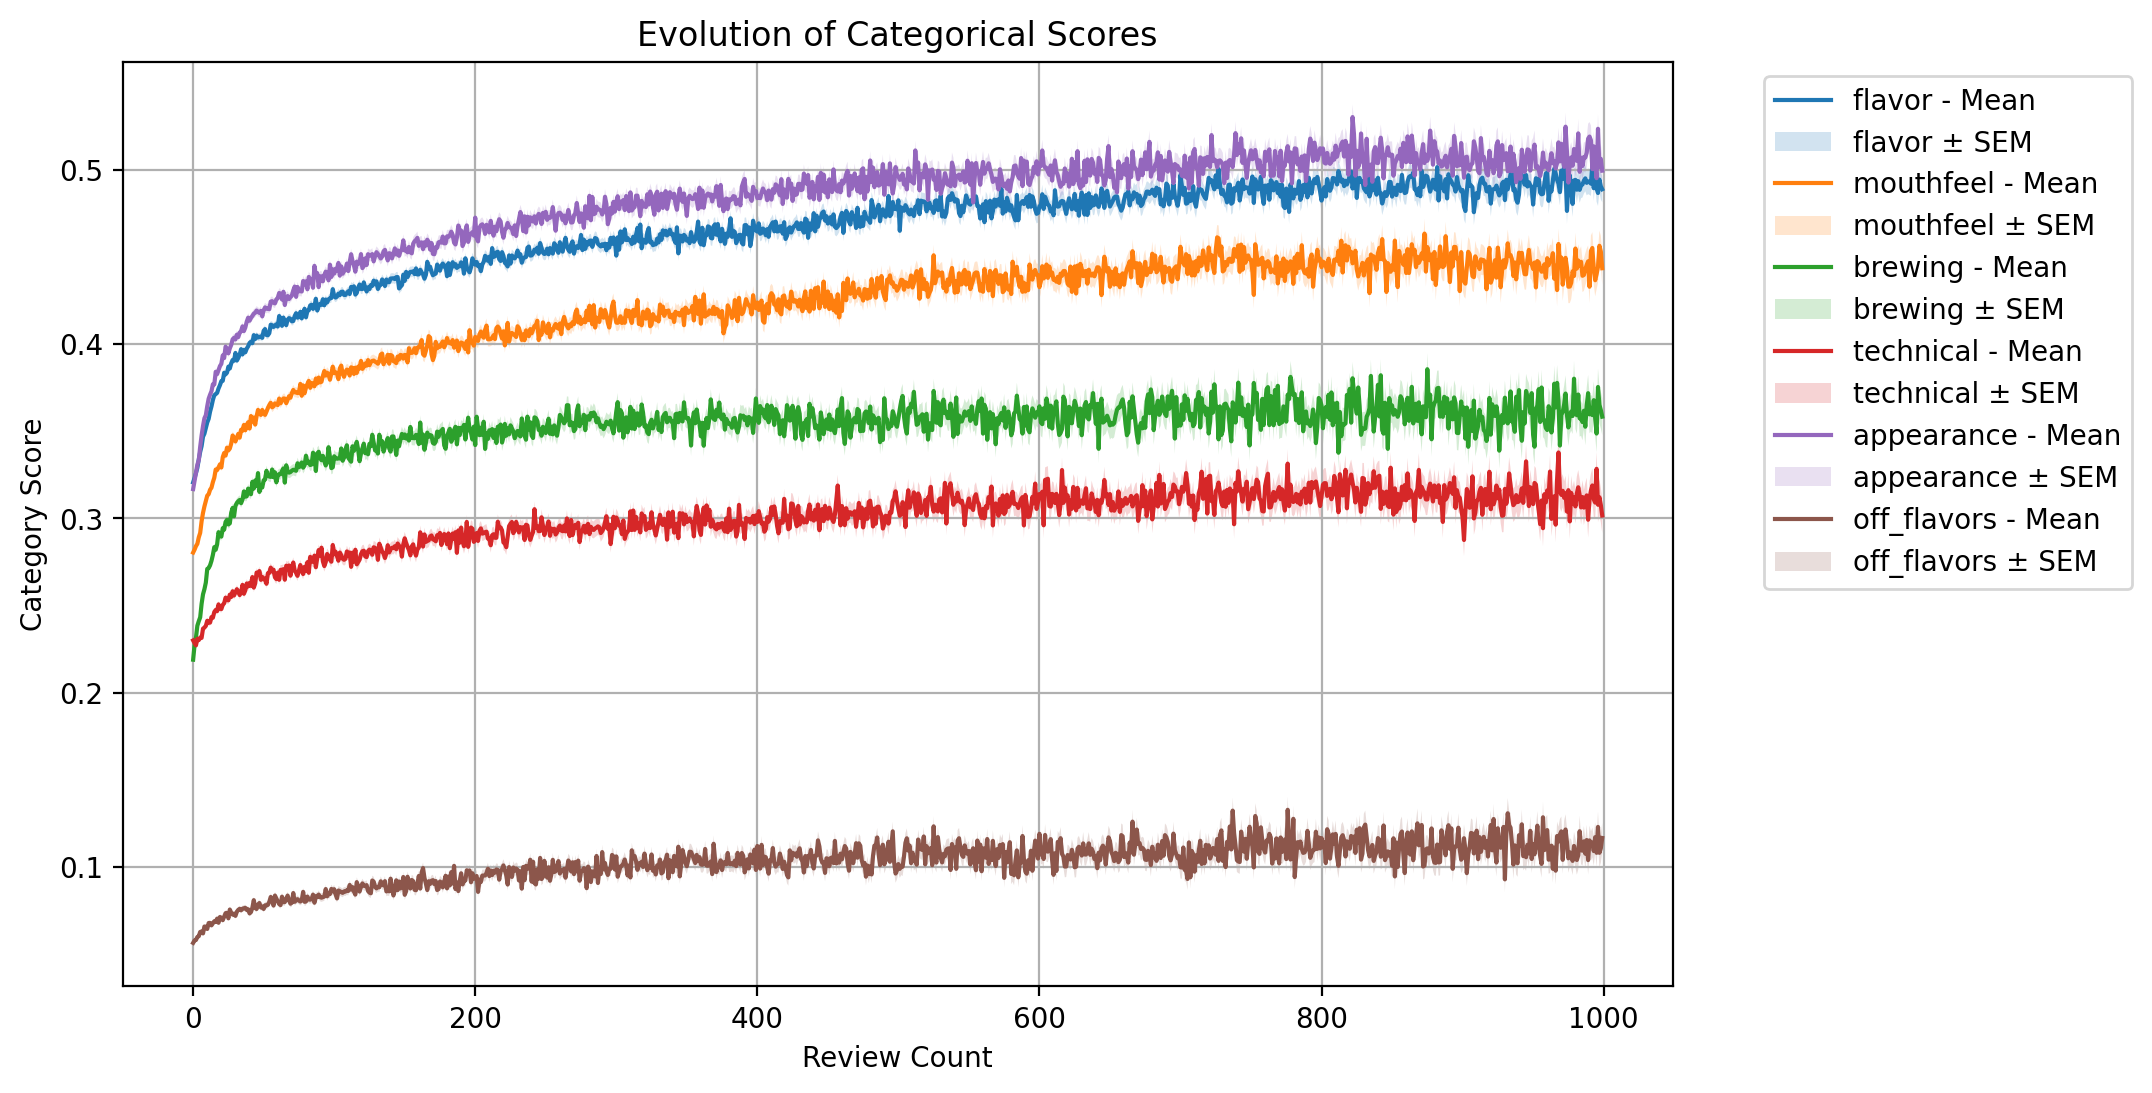

In [23]:
# Initialize a single plot
plt.figure(figsize=(10, 6), dpi=200)

# Loop through each expertise group and calculate stats
for key in exp_categories:
    if key=='expertness_score':
        continue
    # Filter reviews for the current group
    rev_no_al_exp = first_rev.sort_values(by=['user_id', 'date'])

    # Create incremental review numbers for each user
    rev_no_al_exp['rev_nbr'] = rev_no_al_exp.groupby('user_id').cumcount()

    # Drop unnecessary columns
    rev_no_al_exp = rev_no_al_exp.drop(columns=['date'])
    col_to_keep = ['rev_nbr'] + exp_categories

    # Group by review number and calculate mean and SEM
    avg_no_al_exp = rev_no_al_exp[col_to_keep].groupby('rev_nbr').agg(['mean', ('sem', lambda x: x.sem())])

    # Plot the mean line
    plt.plot(
        avg_no_al_exp.index,
        avg_no_al_exp[key]['mean'],
        label=f"{key} - Mean",
    )

    # Plot the SEM as a shaded area
    plt.fill_between(
        avg_no_al_exp.index,
        avg_no_al_exp[key]['mean'] - avg_no_al_exp[key]['sem'],
        avg_no_al_exp[key]['mean'] + avg_no_al_exp[key]['sem'],
        alpha=0.2,
        label=f"{key} ± SEM"
    )

# Formatting the plot
plt.title(f"Evolution of Categorical Scores")
plt.xlabel('Review Count')
plt.ylabel('Category Score')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True)

# Show the combined plot
plt.show()



In [24]:
avg_no_al_exp.to_json("Categorical_avg_evolution.json")

# English and non English countries / expert and non expert

In [25]:
first_rev=first_reviews(first_rev, max=200)
complete_exp_rev = pd.merge(first_rev, users[['user_id', 'location']], on='user_id')
complete_exp_rev = complete_exp_rev.sort_values(by=['user_id', 'date'])

# Create incremental numbers for each user
complete_exp_rev['rev_nbr'] = complete_exp_rev.groupby('user_id').cumcount() 
complete_exp_rev['location'] = complete_exp_rev['location'].str.replace(r'United States, .*', 'United States', regex=True)

In [26]:
#no_eng_countries = ['Italy', 'Spain', 'Germany', 'France', 'Poland', 'Belgium', 'Estonia', 'Austria', 'Croatia', 'Hungary', 'Switzerland']

eng_countries = ['United States','Scotland', 'Ireland', 'England', 'Northern Ireland', 'Australia', 'Canada']

In [27]:
print(len(complete_exp_rev[~complete_exp_rev['location'].isin(eng_countries)& complete_exp_rev['user_id'].isin(exp_levels['Top 20%'])])/nbr_rev)
print(len(complete_exp_rev[complete_exp_rev['location'].isin(eng_countries) & complete_exp_rev['user_id'].isin(exp_levels['Top 20%'])])/nbr_rev)
print(len(complete_exp_rev[~complete_exp_rev['location'].isin(eng_countries)& complete_exp_rev['user_id'].isin(exp_levels['Bottom 20%'])])/nbr_rev)
print(len(complete_exp_rev[complete_exp_rev['location'].isin(eng_countries) & complete_exp_rev['user_id'].isin(exp_levels['Bottom 20%'])])/nbr_rev)

20.587
260.739
11.167
154.209


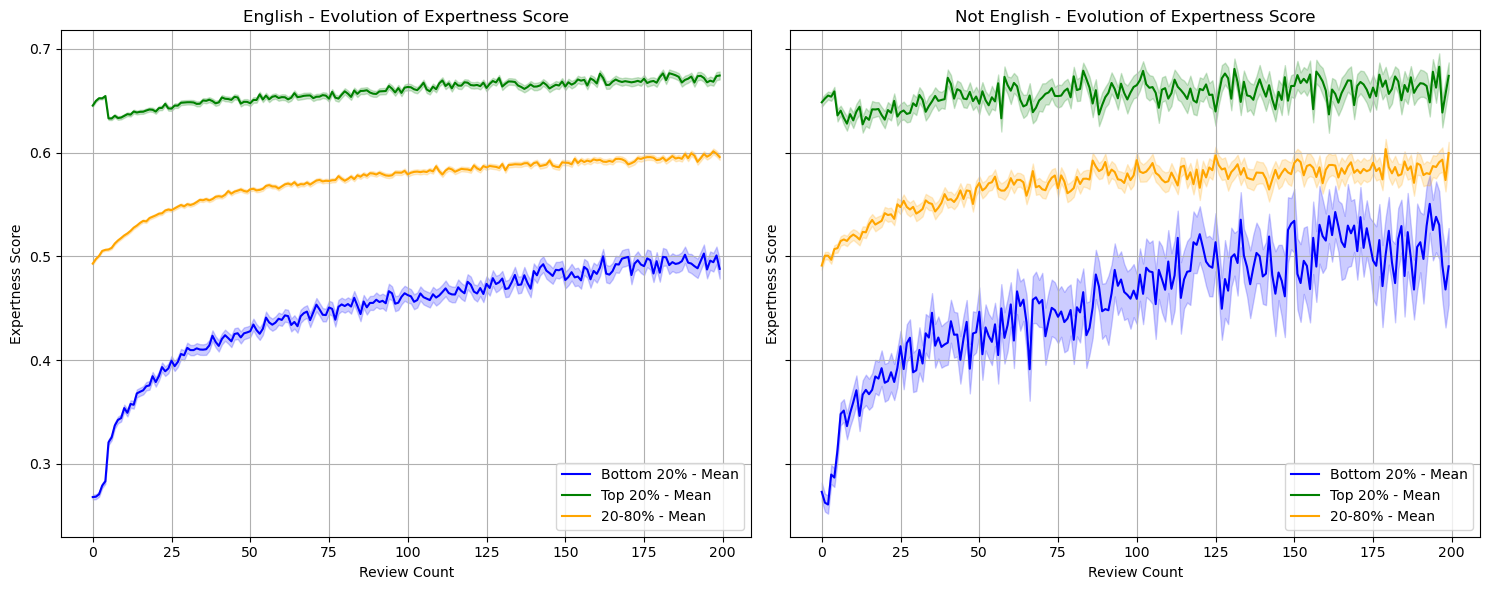

In [28]:
# Define the colors for each expertise group
colors = {
    'Bottom 20%': 'blue',
    'Top 20%': 'green',
    '20-80%': 'orange'
}

# Define country groups: English-speaking vs Non-English-speaking
countries = {
    'English': complete_exp_rev['location'].isin(eng_countries),
    'Not English': ~complete_exp_rev['location'].isin(eng_countries)
}

# Create a figure with subplots: 1 row per country group, 1 plot per group
fig, axes = plt.subplots(nrows=1, ncols=len(countries), figsize=(15, 6), sharey=True)

# Flatten axes if there's more than one row
if len(countries) == 1:
    axes = [axes]

# Iterate through each country group (English / Not English)
for ax, (country_key, country_filter) in zip(axes, countries.items()):
    # Iterate through expertise levels
    for exp_key, exp_value in exp_levels.items():
        # Filter reviews for the current expertise group and country
        rev_filtered = complete_exp_rev[
            complete_exp_rev['user_id'].isin(exp_value) &
            (country_filter)
        ]

        rev_filtered = rev_filtered.sort_values(by=['user_id', 'date'])

        # Create incremental review numbers for each user
        rev_filtered['rev_nbr'] = rev_filtered.groupby('user_id').cumcount()

        # Drop unnecessary columns
        rev_filtered = rev_filtered.drop(columns=['date'])
        col_to_keep = ['rev_nbr'] + exp_categories

        # Group by review number and calculate mean and SEM
        avg_stats = rev_filtered[col_to_keep].groupby('rev_nbr').agg(['mean', ('sem', lambda x: x.sem())])

        # Plot the mean line
        ax.plot(
            avg_stats.index,
            avg_stats['expertness_score']['mean'],
            label=f"{exp_key} - Mean",
            color=colors[exp_key]
        )

        # Plot the SEM as a shaded area
        ax.fill_between(
            avg_stats.index,
            avg_stats['expertness_score']['mean'] - avg_stats['expertness_score']['sem'],
            avg_stats['expertness_score']['mean'] + avg_stats['expertness_score']['sem'],
            color=colors[exp_key],
            alpha=0.2
        )

    # Formatting for each subplot
    ax.set_title(f"{country_key} - Evolution of Expertness Score")
    ax.set_xlabel('Review Count')
    ax.set_ylabel('Expertness Score')
    ax.legend()
    ax.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


# Effect of log normalization

Text(0.5, 1.0, 'Score (raw)')

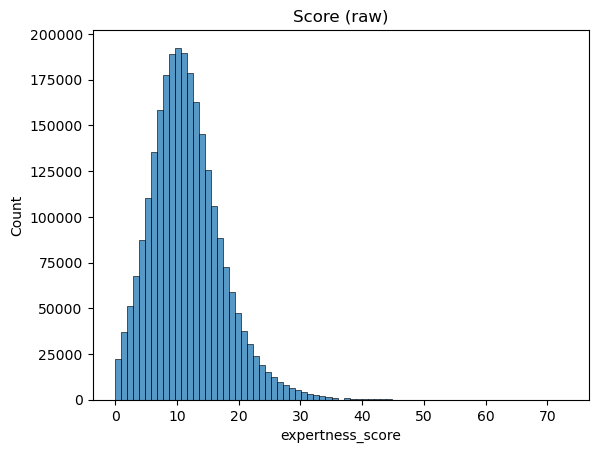

In [29]:
sns.histplot(rev_with_scores.expertness_score, bins = 75)
plt.title('Score (raw)')

Text(0.5, 1.0, 'Score (standardized)')

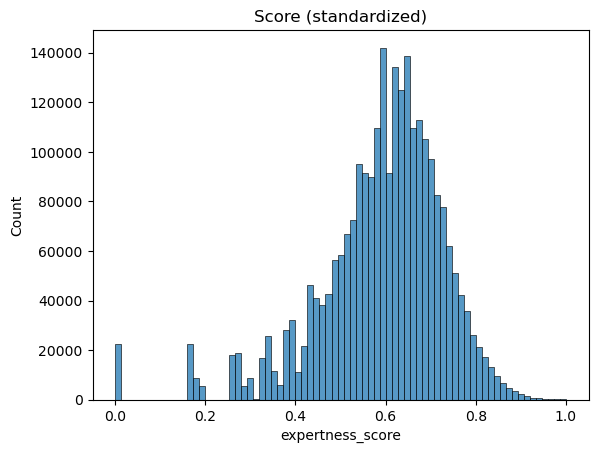

In [30]:
sns.histplot(rev_exp_std.expertness_score, bins = 75)
plt.title('Score (standardized)')